In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
# !pip install opencv-python
import cv2

C:\Users\Weronika\Desktop\Projekty\MLProjects\Tensorflow\PetImages\Cat


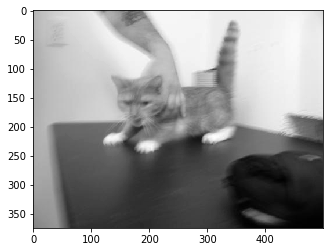

In [2]:
DIR = os.getcwd() + "\\PetImages"

CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:
    path = os.path.join(DIR, category) # /PetImages/Cat
    print(path)
    for img in os.listdir(path): # iterating through images
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        
        break
    break

In [3]:
print(img_array)

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


In [4]:
print(img_array.shape)

(375, 500)


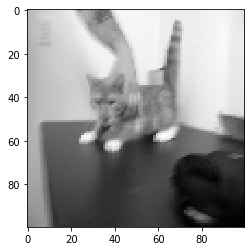

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DIR, category)
        class_num = CATEGORIES.index(category) 
        # get the classification (0 or 1)
        # 0 - cat, 1 - dog
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#                 print(img_array)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()


In [7]:
print(len(training_data))

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
1
1
1
0
0


In [10]:
X = []
y = []

In [11]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# X = np.array(X)
print(X[0])

[[[ 67]
  [ 50]
  [ 58]
  ...
  [208]
  [197]
  [190]]

 [[ 41]
  [ 59]
  [ 91]
  ...
  [206]
  [187]
  [185]]

 [[ 33]
  [ 58]
  [ 49]
  ...
  [180]
  [184]
  [189]]

 ...

 [[127]
  [133]
  [132]
  ...
  [191]
  [189]
  [188]]

 [[126]
  [128]
  [134]
  ...
  [188]
  [189]
  [191]]

 [[126]
  [125]
  [131]
  ...
  [189]
  [185]
  [194]]]


In [12]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
# reading saved pickle model

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [14]:
print(X[0])

[[[ 67]
  [ 50]
  [ 58]
  ...
  [208]
  [197]
  [190]]

 [[ 41]
  [ 59]
  [ 91]
  ...
  [206]
  [187]
  [185]]

 [[ 33]
  [ 58]
  [ 49]
  ...
  [180]
  [184]
  [189]]

 ...

 [[127]
  [133]
  [132]
  ...
  [191]
  [189]
  [188]]

 [[126]
  [128]
  [134]
  ...
  [188]
  [189]
  [191]]

 [[126]
  [125]
  [131]
  ...
  [189]
  [185]
  [194]]]


In [16]:
# plt.imshow(X[22], cmap="gray")
# plt.show()
print(y[22]) # 0 is a cat, 1 is a dog

1
